In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_tip = pd.read_csv('yelp_tip.csv')
data_checkin = pd.read_csv('yelp_checkin.csv')
data_business = pd.read_csv('yelp_business.csv')
data_businesshours = pd.read_csv('yelp_business_hours.csv')
data_user = pd.read_csv('yelp_user.csv')

In [3]:
df_tip = pd.DataFrame(data_tip)
df_checkin = pd.DataFrame(data_checkin)
df_business = pd.DataFrame(data_business)
df_businesshours = pd.DataFrame(data_businesshours)
df_user = pd.DataFrame(data_user)

In [4]:
#df_tip cleaing
df_tip.shape

(1098324, 5)

In [5]:
df_tip.head(n=10)

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ
3,"Parking is a premium, keep circling, you will ...",2017-01-28,0,ESzO3Av0b1_TzKOiqzbQYQ,ulQ8Nyj7jCUR8M83SUMoRQ
4,Homemade pasta is the best in the area,2017-02-25,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ
5,"Excellent service, staff is dressed profession...",2017-04-08,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ
6,Come early on Sunday's to avoid the rush,2016-07-03,0,SqW3igh1_Png336VIb5DUA,ulQ8Nyj7jCUR8M83SUMoRQ
7,Love their soup!,2016-01-07,0,KNpcPGqDORDdvtekXd348w,ulQ8Nyj7jCUR8M83SUMoRQ
8,Soups are fantastic!,2016-05-22,0,KNpcPGqDORDdvtekXd348w,ulQ8Nyj7jCUR8M83SUMoRQ
9,Thursday night is $5 burger night,2016-06-09,0,KNpcPGqDORDdvtekXd348w,ulQ8Nyj7jCUR8M83SUMoRQ


In [6]:
df_tip.dtypes

text           object
date           object
likes           int64
business_id    object
user_id        object
dtype: object

In [7]:
df_tip.isna().sum()

text           2
date           0
likes          0
business_id    0
user_id        0
dtype: int64

In [8]:
df_tip['text'] = df_tip['text'].fillna('None')

In [9]:
df_tip.isna().sum()

text           0
date           0
likes          0
business_id    0
user_id        0
dtype: int64

In [10]:
df_tip.duplicated().sum()

1029

In [11]:
df_tip = df_tip.drop_duplicates()
df_tip.shape

(1097295, 5)

In [12]:
#df_checkin cleaning
df_checkin.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [13]:
df_checkin.shape

(3911218, 4)

In [14]:
df_checkin.isna().sum()

business_id    0
weekday        0
hour           0
checkins       0
dtype: int64

In [15]:
df_checkin.duplicated().sum()

0

In [16]:
#df_business cleaning
df_business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [17]:
df_business.shape

(174567, 13)

In [18]:
df_business.isna().sum()

business_id          0
name                 0
neighborhood    106552
address              0
city                 1
state                1
postal_code        623
latitude             1
longitude            1
stars                0
review_count         0
is_open              0
categories           0
dtype: int64

In [19]:
df_business['neighborhood'].fillna('Unknown', inplace=True)
df_business['postal_code'].fillna('Unknown', inplace=True)
df_business['city'].fillna('Unknown', inplace=True)
df_business['state'].fillna('Unknown', inplace=True)
df_business['latitude'].fillna('Unknown', inplace=True)
df_business['longitude'].fillna('Unknown', inplace=True)

In [20]:
df_business.isna().sum()

business_id     0
name            0
neighborhood    0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
categories      0
dtype: int64

In [21]:
df_business.duplicated().sum()

0

In [22]:
#df_businesshours cleaning
df_businesshours.head()

,business_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,None,None
1,He-G7vWjzVUysIKrfNbPUQ,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-16:0,8:0-16:0,None
2,KQPW8lFf1y5BT2MxiSZ3QA,None,None,None,None,None,None,None
3,8DShNS-LuFqpEWIp0HxijA,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,11:0-19:0
4,PfOCPjBrlQAnz__NXj9h_w,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-2:0,11:0-0:0


In [23]:
df_businesshours.shape

(174567, 8)

In [24]:
df_businesshours.isna().sum()

business_id    0
monday         0
tuesday        0
wednesday      0
thursday       0
friday         0
saturday       0
sunday         0
dtype: int64

In [25]:
df_businesshours.duplicated().sum()

0

In [26]:
#df_user cleaning
df_user.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


In [27]:
df_user.isna().sum()

user_id                 0
name                  497
review_count            0
yelping_since           0
friends                 0
useful                  0
funny                   0
cool                    0
fans                    0
elite                   0
average_stars           0
compliment_hot          0
compliment_more         0
compliment_profile      0
compliment_cute         0
compliment_list         0
compliment_note         0
compliment_plain        0
compliment_cool         0
compliment_funny        0
compliment_writer       0
compliment_photos       0
dtype: int64

In [28]:
df_user['name'] = df_user['name'].fillna('None')

In [30]:
df_user.isna().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
friends               0
useful                0
funny                 0
cool                  0
fans                  0
elite                 0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [29]:
df_user.duplicated().sum()

0

In [31]:
#Datasets merge (business & businesshours)
merged_data = pd.merge(df_business, df_businesshours, on='business_id', how='inner')
merged_data.head()


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",Unknown,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.33069,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,None,None
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",Unknown,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.1049,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-16:0,8:0-16:0,None
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",Unknown,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.11531,1.5,18,1,Departments of Motor Vehicles;Public Services ...,None,None,None,None,None,None,None
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",Unknown,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,11:0-19:0
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",Unknown,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.47569,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-2:0,11:0-0:0


In [32]:
merged_data.shape

(174567, 20)

In [33]:
merged_data.isnull().sum()

business_id     0
name            0
neighborhood    0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
categories      0
monday          0
tuesday         0
wednesday       0
thursday        0
friday          0
saturday        0
sunday          0
dtype: int64

In [35]:
merged_data.duplicated().sum()

0

In [36]:
#Analysis
#普通用户从创建账号以来平均每个月发多少评论?
normal_users = df_user[df_user['elite'] == 'None']
normal_users['yelping_since'] = pd.to_datetime(normal_users['yelping_since'])

current_date = pd.Timestamp.now()
normal_users['month_since_creation'] = (current_date - normal_users['yelping_since']).dt.days/30

normal_users['average_reviews_per_month'] = normal_users['review_count'] / normal_users['month_since_creation']

average_reviews_per_month_normal = normal_users['average_reviews_per_month'].mean()
average_reviews_per_month_normal


/var/folders/gt/kg06ygw94_31t4c66mzrq6lh0000gn/T/ipykernel_27839/3359586816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_users['yelping_since'] = pd.to_datetime(normal_users['yelping_since'])
/var/folders/gt/kg06ygw94_31t4c66mzrq6lh0000gn/T/ipykernel_27839/3359586816.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_users['month_since_creation'] = (current_date - normal_users['yelping_since']).dt.days/30
/var/folders/gt/kg06ygw94_31t4c66mzrq6lh0000gn/T/ipykernel_27839/3359586816.py:9:

0.09845330430892699

In [37]:
#精英用户平均每月发多少评论？
elite_users = df_user[df_user['elite'] != 'None']
elite_users['yelping_since'] = pd.to_datetime(elite_users['yelping_since'])

current_date = pd.Timestamp.now()
elite_users['month_since_creation'] = (current_date - elite_users['yelping_since']).dt.days/30

elite_users['average_reviews_per_month'] = elite_users['review_count'] / elite_users['month_since_creation']

average_reviews_per_month_elite = elite_users['average_reviews_per_month'].mean()
average_reviews_per_month_elite

/var/folders/gt/kg06ygw94_31t4c66mzrq6lh0000gn/T/ipykernel_27839/3396233534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elite_users['yelping_since'] = pd.to_datetime(elite_users['yelping_since'])
/var/folders/gt/kg06ygw94_31t4c66mzrq6lh0000gn/T/ipykernel_27839/3396233534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elite_users['month_since_creation'] = (current_date - elite_users['yelping_since']).dt.days/30
/var/folders/gt/kg06ygw94_31t4c66mzrq6lh0000gn/T/ipykernel_27839/3396233534.py:8: Set

1.460989610017326

In [38]:
#评论被认为是useful, funny, cool的次数和比例？
total_useful_reviews = df_user['useful'].sum()
total_funny_reviews = df_user['funny'].sum()
total_cool_reviews = df_user['cool'].sum()
print(f"The number of total useful reviews is: {total_useful_reviews}")
print(f"The number of total cool reviews is: {total_cool_reviews}")
print(f"The number of total funny reviews is: {total_funny_reviews}")

total_reviews = total_useful_reviews + total_funny_reviews + total_cool_reviews
useful_ratio = total_useful_reviews / total_reviews
funny_ratio = total_funny_reviews / total_reviews
cool_ratio = total_cool_reviews / total_reviews
print(f"The ratio of total useful reviews is: {useful_ratio}")
print(f"The ratio of total cool reviews is: {cool_ratio}")
print(f"The ratio of total funny reviews is: {funny_ratio}")

The number of total useful reviews is: 38914096
The number of total cool reviews is: 25996163
The number of total funny reviews is: 19376167
The ratio of total useful reviews is: 0.4616887658755397
The ratio of total cool reviews is: 0.30842644816853426
The ratio of total funny reviews is: 0.22988478595592604


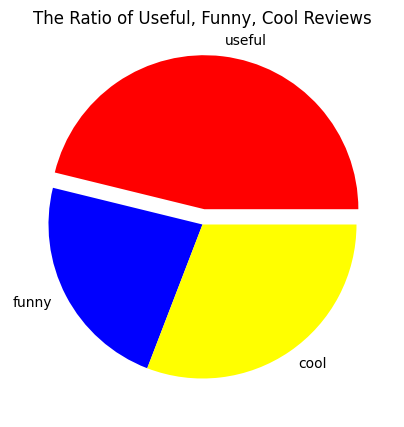

In [99]:
labels = 'useful','funny','cool'
sizes = [useful_ratio, funny_ratio, cool_ratio]
colors = ['red','blue','yellow']
explode = (0.1, 0, 0)

plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors)
plt.title("The Ratio of Useful, Funny, Cool Reviews")
plt.show()

In [48]:
#用户评论平均分
avg_user_ratings = df_user[['user_id','average_stars']]
print(avg_user_ratings)


                        user_id  average_stars
0        JJ-aSuM4pCFPdkfoZ34q0Q           3.70
1        uUzsFQn_6cXDh6rPNGbIFA           2.00
2        mBneaEEH5EMyxaVyqS-72A           4.67
3        W5mJGs-dcDWRGEhAzUYtoA           4.67
4        4E8--zUZO1Rr1IBK4_83fg           3.45
...                         ...            ...
1326095  LODBIwiAcKxRi7Wz-sFsKw           5.00
1326096  JpY2ozlb30z_AZCq2YX34g           5.00
1326097  AU9aZSA1rAjNE5cFcZTVMA           1.85
1326098  s1BZ7-rpqb3xRKcxvArXsQ           3.97
1326099  q-1Tz4SvaTpGEMhI_xwm0Q           3.50

[1326100 rows x 2 columns]


In [50]:
#最常被用户评价的城市？
city_reviews = df_business.groupby('city')['review_count'].sum()
most_reviewed_city = city_reviews.idxmax()
number_of_reviews_city = city_reviews.max()
print(f"The most reviewed city is: {most_reviewed_city}, the number is: {number_of_reviews_city}")

The most reviewed city is: Las Vegas, the number is: 1604173


1.0     3788
1.5     4303
2.0     9320
2.5    16148
3.0    23142
3.5    32038
4.0    33492
4.5    24796
5.0    27540
Name: stars, dtype: int64


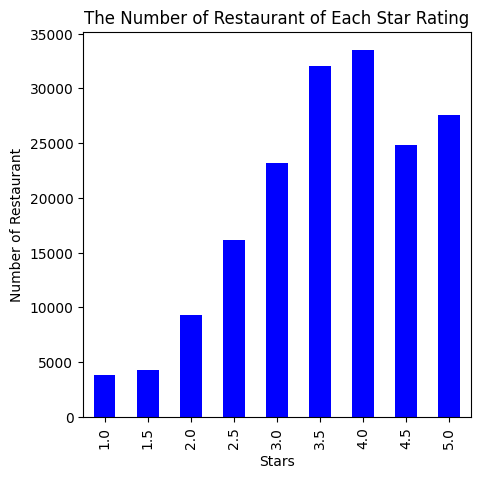

In [100]:
#各星级餐厅数量？
restaurant_stars = df_business['stars'].value_counts().sort_index()
print(restaurant_stars)
plt.figure(figsize=(5,5))
restaurant_stars.plot(kind='bar', color='blue')
plt.title('The Number of Restaurant of Each Star Rating')
plt.xlabel('Stars')
plt.ylabel('Number of Restaurant')
plt.show()

In [54]:
#餐厅平均星级？
average_star_rating = df_business['stars'].mean()
average_star_rating

3.6321956612647295

In [56]:
#哪些州餐厅比较多？
state_with_most_businesses = df_business['state'].value_counts().idxmax()
number_of_businesses = df_business['state'].value_counts().max()
print(f"The most restaurant state is: {state_with_most_businesses}, the number is: {number_of_businesses}")


The most restaurant state is: AZ, the number is: 52214


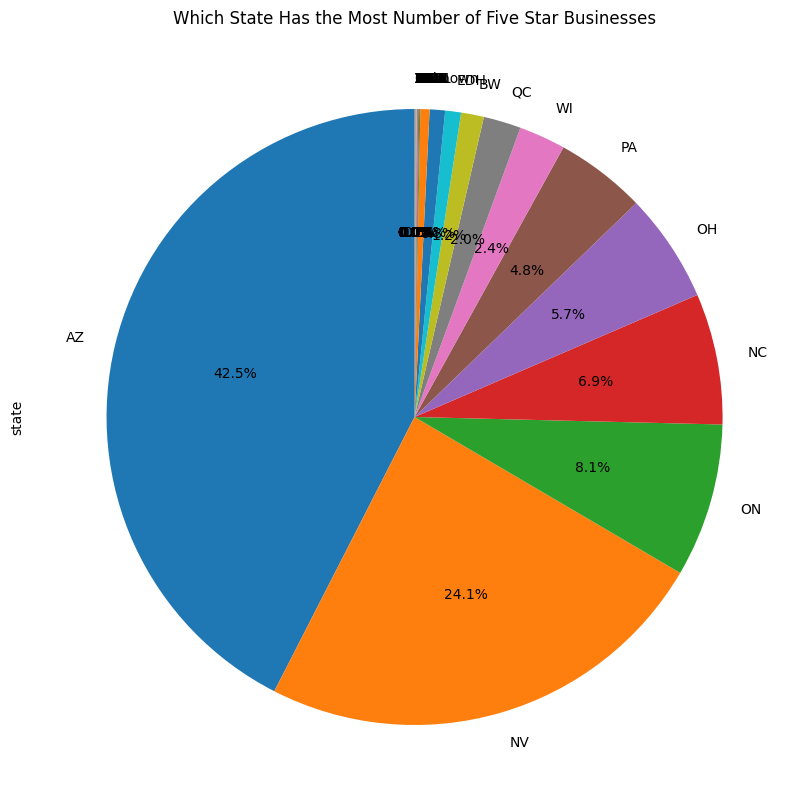

In [64]:
#哪些州五星餐厅占比高？
five_star_business = df_business[df_business['stars'] == 5.0]
five_star_state = five_star_business['state'].value_counts()
states = five_star_state.index
counts = five_star_state.values

five_star_state.plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', startangle=90)
plt.title('Which State Has the Most Number of Five Star Businesses')
plt.show()

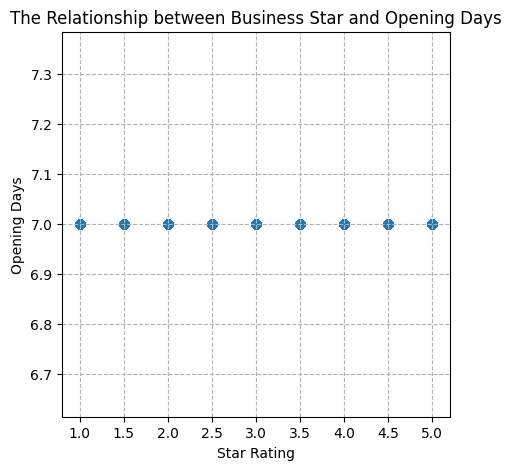

In [101]:
#餐厅的星级和营业天数有怎样的关系？
days_columns = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']

for day in days_columns:
    merged_data[day] = merged_data[day] != 'None'
    merged_data[day] = merged_data[day].astype(int)
merged_data['total_opening_days'] = merged_data[days_columns].sum(axis=1)

plt.figure(figsize=(5,5))
plt.scatter(merged_data['stars'], merged_data['total_opening_days'])
plt.title('The Relationship between Business Star and Opening Days')
plt.xlabel('Star Rating')
plt.ylabel('Opening Days')
plt.grid(True, which="both", ls="--", c="0.7")
plt.show()

In [108]:
merged_data2 = pd.merge(df_business, df_businesshours, on='business_id', how='inner')
merged_data2.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",Unknown,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.33069,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,None,None
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",Unknown,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.1049,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-16:0,8:0-16:0,None
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",Unknown,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.11531,1.5,18,1,Departments of Motor Vehicles;Public Services ...,None,None,None,None,None,None,None
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",Unknown,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,11:0-19:0
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",Unknown,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.47569,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-2:0,11:0-0:0


In [109]:
merged_data2[day]

0              None
1              None
2              None
3         11:0-19:0
4          11:0-0:0
            ...    
174562         None
174563         None
174564         None
174565    12:0-14:0
174566         None
Name: sunday, Length: 174567, dtype: object

In [107]:
merged_data[day]

0         1
1         1
2         1
3         1
4         1
         ..
174562    1
174563    1
174564    1
174565    1
174566    1
Name: sunday, Length: 174567, dtype: int64

In [103]:
newcolumns = merged_data[['business_id', 'stars', 'monday','tuesday','wednesday','thursday','friday','saturday','sunday']]
newcolumns

,business_id,stars,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,4.0,1,1,1,1,1,1,1
1,He-G7vWjzVUysIKrfNbPUQ,3.0,1,1,1,1,1,1,1
2,KQPW8lFf1y5BT2MxiSZ3QA,1.5,1,1,1,1,1,1,1
3,8DShNS-LuFqpEWIp0HxijA,3.0,1,1,1,1,1,1,1
4,PfOCPjBrlQAnz__NXj9h_w,3.5,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
174562,ALV5R8NkZ1KGOZeuZl3u0A,4.0,1,1,1,1,1,1,1
174563,gRGalHVu6BcaUDIAGVW_xQ,5.0,1,1,1,1,1,1,1
174564,XXvZBIHoJBU5d6-a-oyMWQ,1.5,1,1,1,1,1,1,1
174565,lNpPGgM96nPIYM1shxciHg,5.0,1,1,1,1,1,1,1


In [105]:
newcolumns['opendays'] = newcolumns['monday'] + newcolumns['tuesday'] + newcolumns['wednesday'] + newcolumns['thursday'] + newcolumns['friday'] + newcolumns['saturday'] + newcolumns['sunday']
newcolumns

/var/folders/gt/kg06ygw94_31t4c66mzrq6lh0000gn/T/ipykernel_27839/3704511594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newcolumns['opendays'] = newcolumns['monday'] + newcolumns['tuesday'] + newcolumns['wednesday'] + newcolumns['thursday'] + newcolumns['friday'] + newcolumns['saturday'] + newcolumns['sunday']


,business_id,stars,monday,tuesday,wednesday,thursday,friday,saturday,sunday,opendays
0,FYWN1wneV18bWNgQjJ2GNg,4.0,1,1,1,1,1,1,1,7
1,He-G7vWjzVUysIKrfNbPUQ,3.0,1,1,1,1,1,1,1,7
2,KQPW8lFf1y5BT2MxiSZ3QA,1.5,1,1,1,1,1,1,1,7
3,8DShNS-LuFqpEWIp0HxijA,3.0,1,1,1,1,1,1,1,7
4,PfOCPjBrlQAnz__NXj9h_w,3.5,1,1,1,1,1,1,1,7
...,...,...,...,...,...,...,...,...,...,...
174562,ALV5R8NkZ1KGOZeuZl3u0A,4.0,1,1,1,1,1,1,1,7
174563,gRGalHVu6BcaUDIAGVW_xQ,5.0,1,1,1,1,1,1,1,7
174564,XXvZBIHoJBU5d6-a-oyMWQ,1.5,1,1,1,1,1,1,1,7
174565,lNpPGgM96nPIYM1shxciHg,5.0,1,1,1,1,1,1,1,7


In [106]:
avg_opendays = newcolumns.groupby(['opendays']).mean()
avg_opendays

/var/folders/gt/kg06ygw94_31t4c66mzrq6lh0000gn/T/ipykernel_27839/1155390910.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_opendays = newcolumns.groupby(['opendays']).mean()


,stars,monday,tuesday,wednesday,thursday,friday,saturday,sunday
opendays,,,,,,,,
7,3.632196,1.0,1.0,1.0,1.0,1.0,1.0,1.0


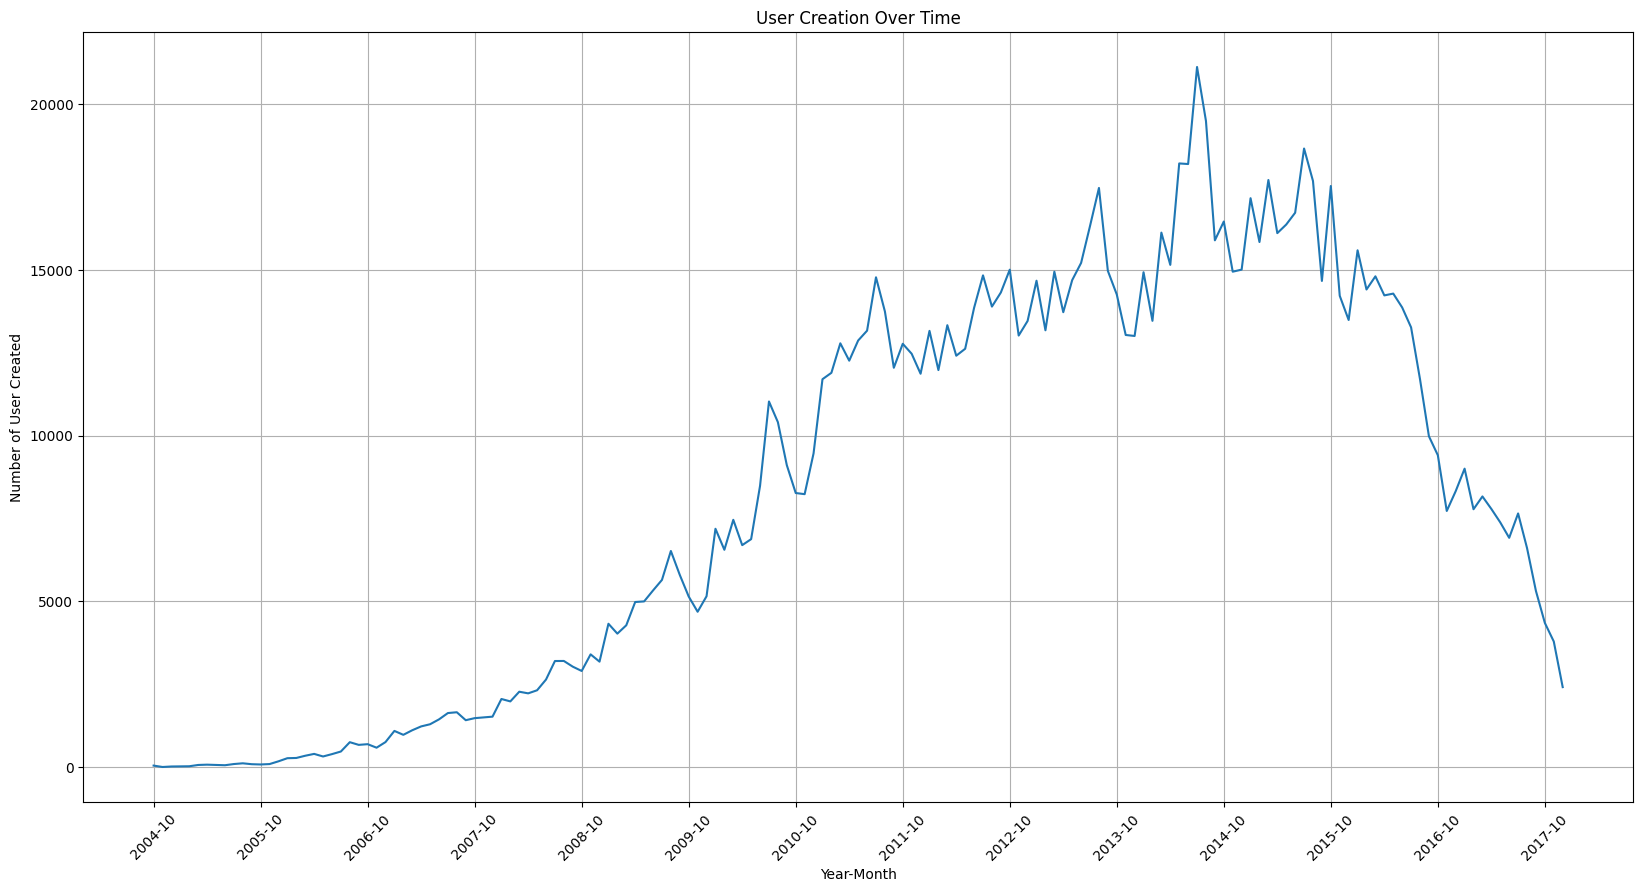

In [111]:
#各年各月注册用户数
df_user['yelping_since'] = pd.to_datetime(df_user['yelping_since'])
df_user['year'] = df_user['yelping_since'].dt.year
df_user['month'] = df_user['yelping_since'].dt.month
user_creation = df_user.groupby(['year','month']).size().reset_index(name='count')

plt.figure(figsize=(20,10))
timeline = user_creation['year'].astype(str) + '-' + user_creation['month'].astype(str).str.zfill(2)
plt.plot(timeline, user_creation['count'])

plt.xticks(timeline[::12], rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Number of User Created')
plt.title('User Creation Over Time')
plt.grid(True)
plt.show()

In [ ]:
# create plot for every year

In [ ]:
#各年精英客户数量和占比？


/var/folders/gt/kg06ygw94_31t4c66mzrq6lh0000gn/T/ipykernel_27839/3019116885.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_retention = df_retention.append({'Year' : year, 'Retention_Rate' : retention_rate}, ignore_index=True)


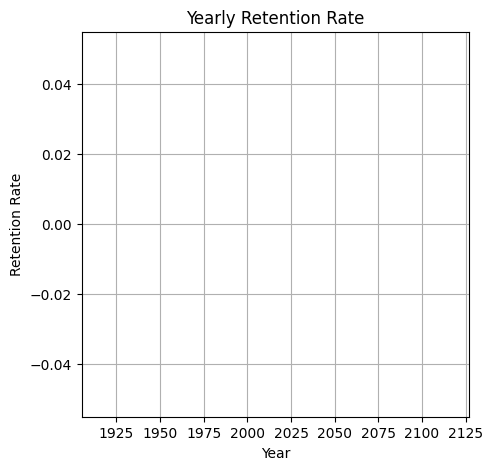

In [112]:
#用户年留存率如何？精英用户年留存率如何？
df_user['join_year'] = pd.to_datetime(df_user['yelping_since']).dt.year
df_retention = pd.DataFrame(columns=['Year','Retention_Rate'])

for year in range(2004, 2017):
    users = df_user[df_user['join_year'] == year]
    second_year_users = df_user[(df_user['join_year'] == year+1) & (df_user['user_id'].isin(users['user_id']))]
    
    if len(users) !=0:
        retention_rate = (len(second_year_users)/len(users))*100
    else:
        retention_rate = 0

df_retention = df_retention.append({'Year' : year, 'Retention_Rate' : retention_rate}, ignore_index=True)


plt.figure(figsize=(5,5))
plt.plot(df_retention['Year'], df_retention['Retention_Rate'])
plt.title('Yearly Retention Rate')
plt.xlabel('Year')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.show()

In [113]:
df_retention

,Year,Retention_Rate
0,2016.0,0.0
